# Tarea 2 - Álgebra Lineal y Optimización para Data Science

### Integrantes: Álex Álvarez y Alfonso Tobar

Debe entregar este Colab con sus respuestas a más tardar el día 29 de Noviembre a las 23:59 hrs, vía Webcursos. No olvide indicar los integrantes de su grupo.


**Observación**: Hay un punto adicional (Bonus al final). En caso de sobrar décimas puede usarlas en otras tareas. 

## Pregunta 1

1. (1.5 pts) Implemente una función `pca_eig(A, k)` que reciba una matriz $A$ de $n\times m$ (cada fila es un dato en $\mathbb{R}^m$) y un número $k$.
  - Si $k\geq 1$, entonces la función retorna una matriz $C$ de $k\times m$ donde las filas son las $k$ componentes principales y un arreglo $var$ que contiene el ratio de la varianza explicada por cada una de las $k$ componentes principales. 
  - Si $0< k < 1$, entonces $k$ se interpreta como el ratio de varianza que queremos alcanzar. Es decir, calculamos la mínima cantidad de componentes principales que necesitamos para alcanzar el ratio $k$ de varianza explicada. Igual que antes retornamos la matriz $C$ y el arreglo $var$. 

 Notar que en ambos casos, la salida corresponde a lo que obtendríamos con la clase PCA de scikit-learn. La matriz $C$ corresponde al atributo `components_` de la clase PCA, mientras que el arreglo $var$ corresponde a `explained_variance_ratio_`. Para más detalles ver:

 https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

 Para implementar su función `pca_eig(A, k)` **debe** aplicar el método PCA visto en la clase 08 y usar la función `numpy.linalg.eig`. Puede utilizar otras funciones de NumPy que necesite. 

In [1]:
import numpy as np

def pca_eig(A,k):
    #centrado de datos
    A_center = A-A.mean(axis = 0)
    #matriz covarianza
    S = 1/(A.shape[0]-1)*A_center.T@A_center
    # Vectores y valores propios ordenados de mayor a menor
    var, P = np.linalg.eig(S)
    idx = np.argsort(-var)
    var, P = var[idx]/var.sum(), P[:,idx] #varianza normalizada... 

    if 1 <= k <= A.shape[1]:
        return P.T[:k], var[:k] 

    elif 0 < k < 1:
        idx = np.argmax(var.cumsum() > k) + 1
        return P.T[:idx], var[:idx]
    else:
        raise Exception("k debe ser un número entre 0 y el número de columnas de A")

2. (1.5 pts) Implemente una función `pca_svd(A, k)` que reciba una matriz $A$ de $n\times m$ (cada fila es un dato en $\mathbb{R}^m$) y un número $k$, y retorne lo mismo que en la pregunta anterior. 

  Debe implementar su función utilizando el método `numpy.linalg.svd` (y **no** el método `numpy.linalg.eig`). Puede utilizar otras funciones de NumPy que necesite. 


In [2]:
def pca_svd(A,k):
    A_center = A-A.mean(axis = 0)
    # SVD
    u, s, vh = np.linalg.svd(A_center)
    var = s**2/(A.shape[0]-1)
    var = var/var.sum()

    if 1 <= k <= A.shape[1]:
        return vh[:k], var[:k] 
    elif 0 < k < 1:
        idx = np.argmax(var.cumsum() > k) +1
        return vh[:idx], var[:idx]
    else:
        raise Exception("k debe ser un número entre 0 y el número de columnas de A")

3. (1.0 pts) Compare los resultados de sus funciones `pca_eig(A, k)` y `pca_svd(A, k)`, con los resultados de la clase PCA de scikit-learn sobre dos datasets: 
- El Iris flower dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). En este caso pruebe valores $k=2$, $k=3$, $k=0.95$ y $k=0.98$.
- El Digits dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). En este caso pruebe valores $k=3$, $k=5$, $k=0.9$ y $k=0.95$. 

 ¿Obtiene los mismos resultados que scikit-learn?

In [3]:
from sklearn.datasets import load_iris
A_iris = load_iris().data

for k in [2,3,0.95,0.98]:
    C, var_exp = pca_eig(A_iris, k)
    print("PCA Eigen: Iris, k = ", k)
    print("C: -----------------------------------------------------------")
    print(C)
    print("Var Exp: -----------------------------------------------------")
    print(var_exp)
    print("")

PCA Eigen: Iris, k =  2
C: -----------------------------------------------------------
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]]
Var Exp: -----------------------------------------------------
[0.92461872 0.05306648]

PCA Eigen: Iris, k =  3
C: -----------------------------------------------------------
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]
Var Exp: -----------------------------------------------------
[0.92461872 0.05306648 0.01710261]

PCA Eigen: Iris, k =  0.95
C: -----------------------------------------------------------
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]]
Var Exp: -----------------------------------------------------
[0.92461872 0.05306648]

PCA Eigen: Iris, k =  0.98
C: -----------------------------------------------------------
[[ 0.361386

In [4]:
for k in [2,3,0.95,0.98]:
    C, var_exp = pca_svd(A_iris, k)
    print("PCA SVD: Iris, k = ", k)
    print("C: -----------------------------------------------------------")
    print(C)
    print("Var Exp: -----------------------------------------------------")
    print(var_exp)
    print("")

PCA SVD: Iris, k =  2
C: -----------------------------------------------------------
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]]
Var Exp: -----------------------------------------------------
[0.92461872 0.05306648]

PCA SVD: Iris, k =  3
C: -----------------------------------------------------------
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]
 [ 0.58202985 -0.59791083 -0.07623608 -0.54583143]]
Var Exp: -----------------------------------------------------
[0.92461872 0.05306648 0.01710261]

PCA SVD: Iris, k =  0.95
C: -----------------------------------------------------------
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]]
Var Exp: -----------------------------------------------------
[0.92461872 0.05306648]

PCA SVD: Iris, k =  0.98
C: -----------------------------------------------------------
[[ 0.36138659 -0.08

In [5]:
from sklearn.decomposition import PCA
for k in [2,3,0.95,0.98]:
    pca = PCA(n_components = k)
    pca.fit(A_iris)
    C, var_exp = pca.components_, pca.explained_variance_ratio_
    print("PCA Sklearn: Iris, k = ", k)
    print("C: -----------------------------------------------------------")
    print(C)
    print("Var Exp: -----------------------------------------------------")
    print(var_exp)
    print("")

PCA Sklearn: Iris, k =  2
C: -----------------------------------------------------------
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
Var Exp: -----------------------------------------------------
[0.92461872 0.05306648]

PCA Sklearn: Iris, k =  3
C: -----------------------------------------------------------
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]
Var Exp: -----------------------------------------------------
[0.92461872 0.05306648 0.01710261]

PCA Sklearn: Iris, k =  0.95
C: -----------------------------------------------------------
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
Var Exp: -----------------------------------------------------
[0.92461872 0.05306648]

PCA Sklearn: Iris, k =  0.98
C: -----------------------------------------------------------
[[ 

In [6]:
from sklearn.datasets import load_digits
A_digits = load_digits().data

for k in [2,3,0.95,0.98]:
    C, var_exp = pca_eig(A_digits, k)
    print("PCA Eigen: Iris, k = ", k)
    print("C: -----------------------------------------------------------")
    print(C)
    print("Var Exp: -----------------------------------------------------")
    print(var_exp)
    print("")

PCA Eigen: Iris, k =  2
C: -----------------------------------------------------------
[[ 0.00000000e+00  1.73094651e-02  2.23428835e-01  1.35913304e-01
   3.30323092e-02  9.66340844e-02  8.32943805e-03 -2.26900082e-03
   3.20516495e-04  1.19308905e-01  2.44451676e-01 -1.48512745e-01
   4.67319410e-02  2.17740744e-01  1.48136776e-02 -4.47779518e-03
   4.94136398e-05  7.95419375e-02 -8.33951454e-02 -2.15915342e-01
   1.72126801e-01  1.63712098e-01 -2.86444452e-02 -4.23251803e-03
  -9.85488574e-05 -6.42319144e-02 -2.54093316e-01  3.56771026e-02
   2.09462569e-01  4.31311420e-02 -5.13118688e-02 -2.13422732e-04
   0.00000000e+00 -1.59950883e-01 -3.68690774e-01 -1.64406827e-01
  -8.52007908e-02 -3.72982855e-02 -2.15866980e-02  0.00000000e+00
  -1.28865585e-03 -1.06945287e-01 -3.03067457e-01 -2.47813041e-01
  -2.09637296e-01 -1.22325219e-02  3.69458497e-02 -1.61485028e-03
  -6.93023548e-04  8.35144239e-03  5.58598986e-02 -9.30534169e-02
  -1.07387720e-01  1.37734565e-01  6.32879466e-02 -9.61

In [7]:
for k in [2,3,0.95,0.98]:
    C, var_exp = pca_svd(A_digits, k)
    print("PCA SVD: Iris, k = ", k)
    print("C: -----------------------------------------------------------")
    print(C)
    print("Var Exp: -----------------------------------------------------")
    print(var_exp)
    print("")

PCA SVD: Iris, k =  2
C: -----------------------------------------------------------
[[ 1.77484909e-19  1.73094651e-02  2.23428835e-01  1.35913304e-01
   3.30323092e-02  9.66340844e-02  8.32943805e-03 -2.26900082e-03
   3.20516495e-04  1.19308905e-01  2.44451676e-01 -1.48512745e-01
   4.67319410e-02  2.17740744e-01  1.48136776e-02 -4.47779518e-03
   4.94136398e-05  7.95419375e-02 -8.33951454e-02 -2.15915342e-01
   1.72126801e-01  1.63712098e-01 -2.86444452e-02 -4.23251803e-03
  -9.85488574e-05 -6.42319144e-02 -2.54093316e-01  3.56771026e-02
   2.09462569e-01  4.31311420e-02 -5.13118688e-02 -2.13422732e-04
   0.00000000e+00 -1.59950883e-01 -3.68690774e-01 -1.64406827e-01
  -8.52007908e-02 -3.72982855e-02 -2.15866980e-02  0.00000000e+00
  -1.28865585e-03 -1.06945287e-01 -3.03067457e-01 -2.47813041e-01
  -2.09637296e-01 -1.22325219e-02  3.69458497e-02 -1.61485028e-03
  -6.93023548e-04  8.35144239e-03  5.58598986e-02 -9.30534169e-02
  -1.07387720e-01  1.37734565e-01  6.32879466e-02 -9.6167

In [8]:
from sklearn.decomposition import PCA
for k in [2,3,0.95,0.98]:
    pca = PCA(n_components = k)
    pca.fit(A_digits)
    C, var_exp = pca.components_, pca.explained_variance_ratio_
    print("PCA Sklearn: Iris, k = ", k)
    print("C: -----------------------------------------------------------")
    print(C)
    print("Var Exp: -----------------------------------------------------")
    print(var_exp)
    print("")

PCA Sklearn: Iris, k =  2
C: -----------------------------------------------------------
[[ 1.27026793e-17 -1.73094389e-02 -2.23428692e-01 -1.35913336e-01
  -3.30323118e-02 -9.66339887e-02 -8.32937427e-03  2.26900772e-03
  -3.20516470e-04 -1.19308838e-01 -2.44451666e-01  1.48512729e-01
  -4.67318844e-02 -2.17740746e-01 -1.48136331e-02  4.47779928e-03
  -4.94138853e-05 -7.95419160e-02  8.33951302e-02  2.15915399e-01
  -1.72126834e-01 -1.63712102e-01  2.86444822e-02  4.23251893e-03
   9.85487032e-05  6.42318866e-02  2.54093358e-01 -3.56770573e-02
  -2.09462643e-01 -4.31309874e-02  5.13119277e-02  2.13422806e-04
  -0.00000000e+00  1.59950868e-01  3.68690836e-01  1.64406871e-01
   8.52007568e-02  3.72983641e-02  2.15867159e-02 -0.00000000e+00
   1.28865640e-03  1.06945283e-01  3.03067447e-01  2.47813145e-01
   2.09637341e-01  1.22325393e-02 -3.69458457e-02  1.61485205e-03
   6.93024050e-04 -8.35142462e-03 -5.58598506e-02  9.30534813e-02
   1.07387771e-01 -1.37734514e-01 -6.32878590e-02  9.

## Pregunta 2

1. (1.0 pts) Implemente una función `comprimir_imagen(A, p)` que recibe una matriz $A$ representando una imagen en escala de grises (las entradas son valores entre 0 y 255) y un parámetro $p$ entre $0$ y $1$. La función debe retornar la mejor aproximación de $A$ de rango $\lfloor p\cdot r\rfloor$ donde $r$ es el rango de la matriz $A$. Para implementar su función, **debe** usar `numpy.linalg.svd`.

In [9]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from PIL import Image

def comprimir_imagen(A,p): 
    r = int(np.floor(p*np.linalg.matrix_rank(A)))
    print(r)
    u, s, v = np.linalg.svd(A)
    A_new = np.zeros_like(A, dtype="float")
    for idx in range(r):
        A_new+= s[idx]*np.outer(u[:,idx], v[idx,:])
    plt.imshow(A_new, cmap='gray')
    plt.axis("off")
    plt.title(f"Imagen comprimida, p = {p}")
    plt.show();


5


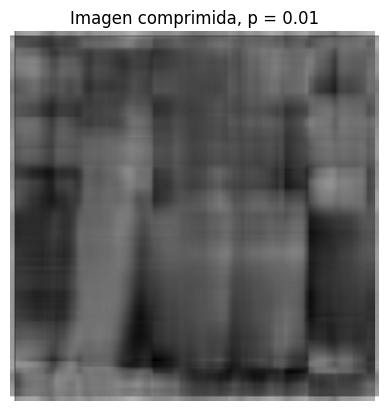

27


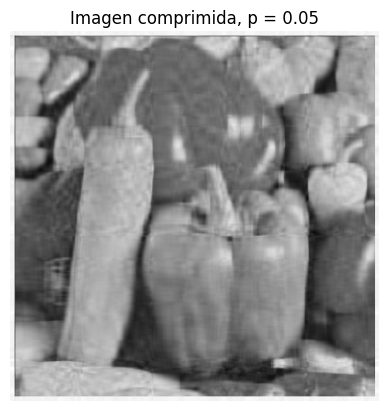

54


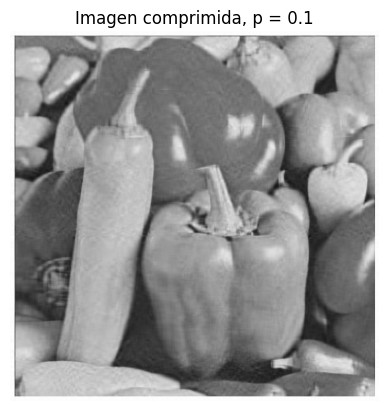

81


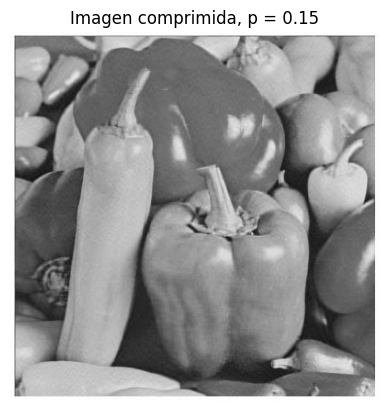

163


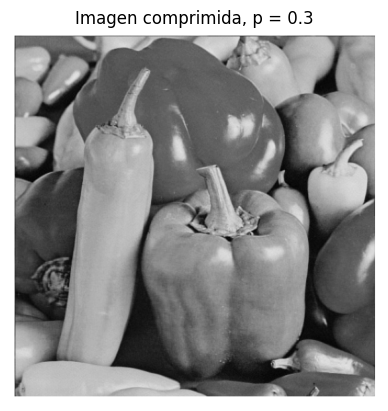

272


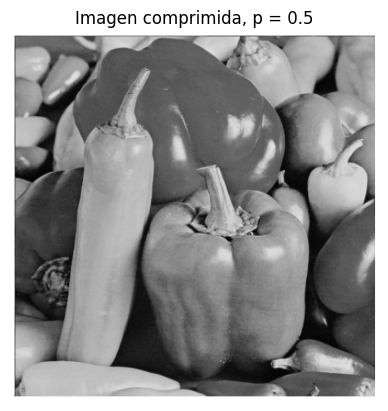

In [10]:
pic = Image.open("pepper.png").convert('L')
pic = np.array(pic.getdata()).reshape(pic.size[1], pic.size[0])
plt.imshow(pic, cmap = 'gray')
plt.axis('off');

for r in [0.01, 0.05, 0.10, 0.15, 0.3, 0.5]:
    comprimir_imagen(pic, r)

2. (1.0 pts) Pruebe su función `comprimir_imagen(A, p)` con una imagen y al menos 4 valores de $p$. Muestre las imágenes comprimidas. Para el manejo de imágenes (pasar de imagen a matriz y viceversa) puede utilizar la librería que más le acomode, por ejemplo matplotlib o pillow:

 https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py

## Bonus

1. (1.0 pts) Implemente una función `PageRank(A, d)` que recibe la matriz de adyacencia $A$ de un grafo dirigido y un número $d\in [0,1]$, y retorna un vector con los pageranks de los nodos del grafo utilizando $d$ como dumping factor. Para esto **debe** usar el método explicado en clases y la función `numpy.linalg.eig`. Puede utilizar otras funciones de NumPy que necesite. Diseñe sus propios ejemplos de prueba para corroborar la correctitud de su método. 

![](pagerank.png)

In [11]:
A = np.array([
            [0,1,0,0,0,0,0,0],
            [1,0,1,0,0,0,0,0],
            [0,0,0,0,0,1,0,0], 
            [0,1,0,0,1,0,0,1],
            [0,0,1,1,0,1,0,1],
            [0,0,1,0,0,0,0,0],
            [0,0,1,1,0,0,0,0],
            [0,0,1,1,0,0,0,0],
            ])
d = 0.85

def PageRank(A, d):
    A = A/A.sum(axis = 1).reshape(-1,1)
    P = A*d+(1-d)/len(A)*np.ones_like(A)
    eig_val, eig_vec = np.linalg.eig(P.T)

    return eig_vec[:,0]/eig_vec[:,0].sum()

PageRank(A, d)

array([0.05141623, 0.07686172, 0.37997977, 0.0508515 , 0.03315793,
       0.34877886, 0.01875   , 0.04020399])